# Ejercicio 5



In [ ]:
!wget https://content.nationalgeographic.com.es/medio/2022/12/12/tigre-1_949ea198_221212162024_1280x720.jpg
!wget https://st3.depositphotos.com/1400069/37649/i/450/depositphotos_376490520-stock-photo-abstract-black-background-blank-concrete.jpg

--2024-05-11 04:40:46--  https://content.nationalgeographic.com.es/medio/2022/12/12/tigre-1_949ea198_221212162024_1280x720.jpg
Resolving content.nationalgeographic.com.es (content.nationalgeographic.com.es)... 23.216.147.48, 23.216.147.63
Connecting to content.nationalgeographic.com.es (content.nationalgeographic.com.es)|23.216.147.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 133930 (131K) [image/jpeg]
Saving to: ‘tigre-1_949ea198_221212162024_1280x720.jpg’

tigre-1_949ea198_22 100%[===================>] 130.79K  --.-KB/s    in 0.01s   

2024-05-11 04:40:46 (10.2 MB/s) - ‘tigre-1_949ea198_221212162024_1280x720.jpg’ saved [133930/133930]

--2024-05-11 04:40:46--  https://st3.depositphotos.com/1400069/37649/i/450/depositphotos_376490520-stock-photo-abstract-black-background-blank-concrete.jpg
Resolving st3.depositphotos.com (st3.depositphotos.com)... 23.196.205.111
Connecting to st3.depositphotos.com (st3.depositphotos.com)|23.196.205.111|:443... connected

Librerias


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


**Lectura Imagen**

In [ ]:
img = cv2.imread('tigre.jpg')


**Redimensionar Imagen**

In [ ]:
x = y  = 600
img = cv2.resize(img,(x,y))

**Volver escala de grises imagen**

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray2 = np.float64(gray)

**Transformada de fourier**

In [ ]:
frr = np.fft.fft2(gray2)
frr = np.fft.fftshift(frr)


**Calcular la magnitud del arreglo**

In [ ]:
frr_abs = np.abs(frr)

**Espectro de frecuencia en escala logaritmica**

In [ ]:
frr_log = 20*np.log10(frr_abs)

**Ploteo de la Imagen**

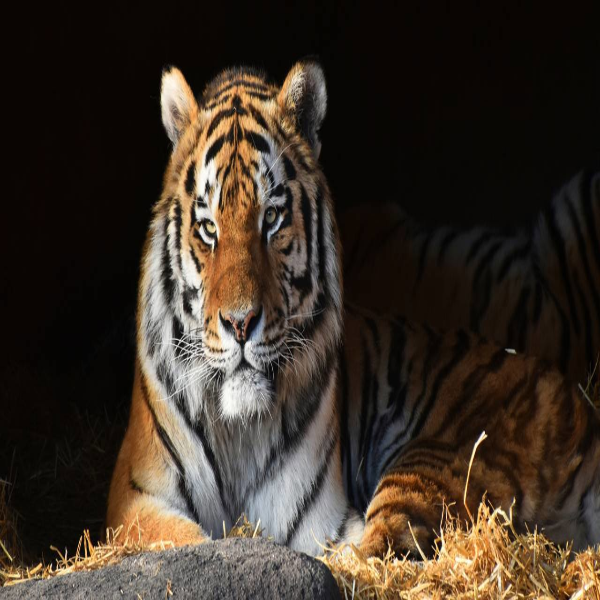

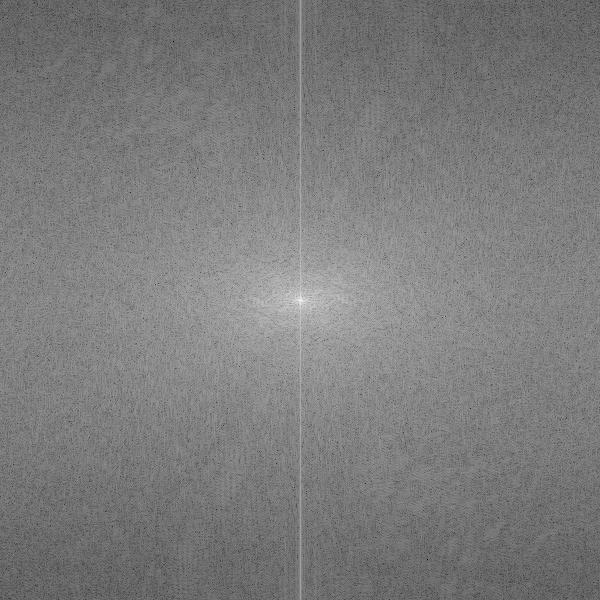

In [ ]:
cv2_imshow(img)
img_frr = np.uint8(255*frr_log/np.max(frr_log))
cv2_imshow(img_frr)

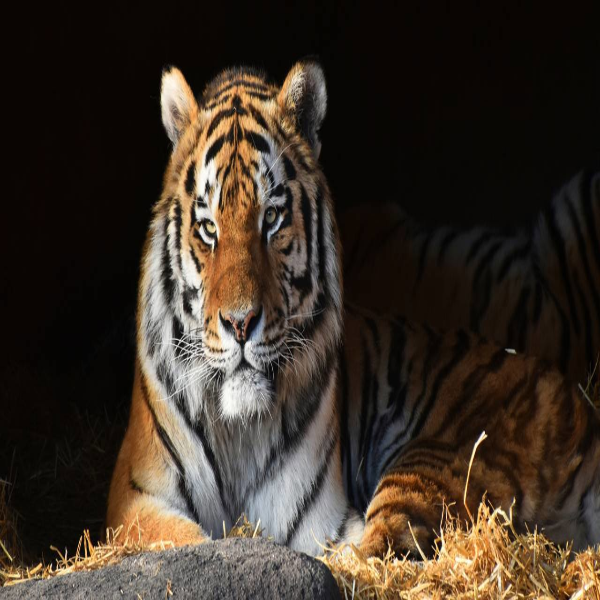

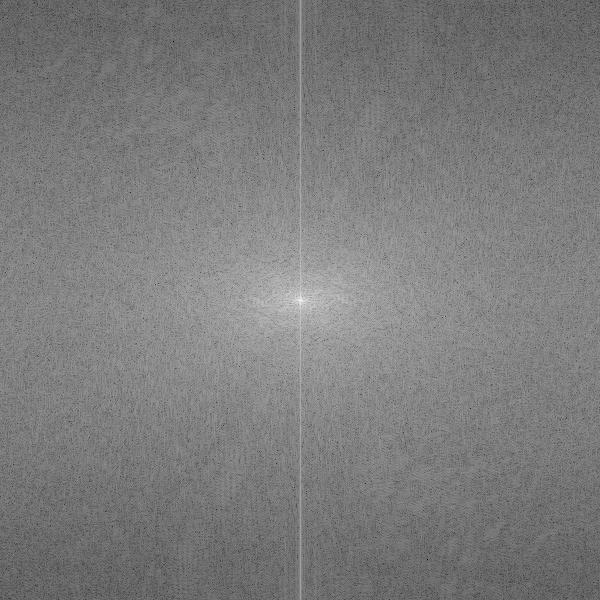

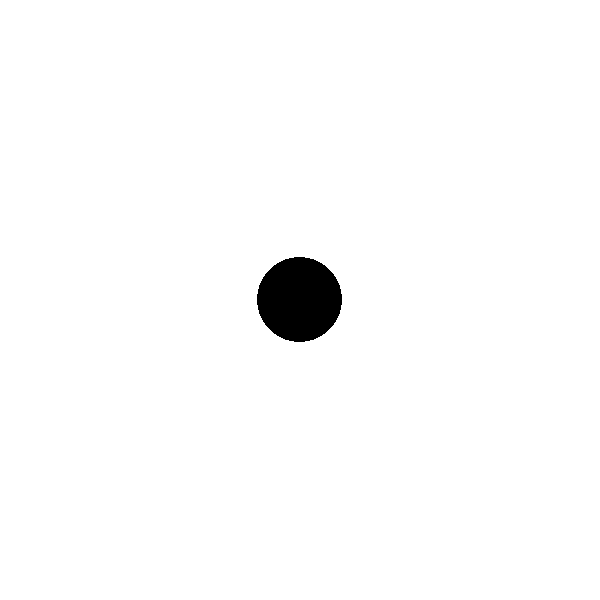

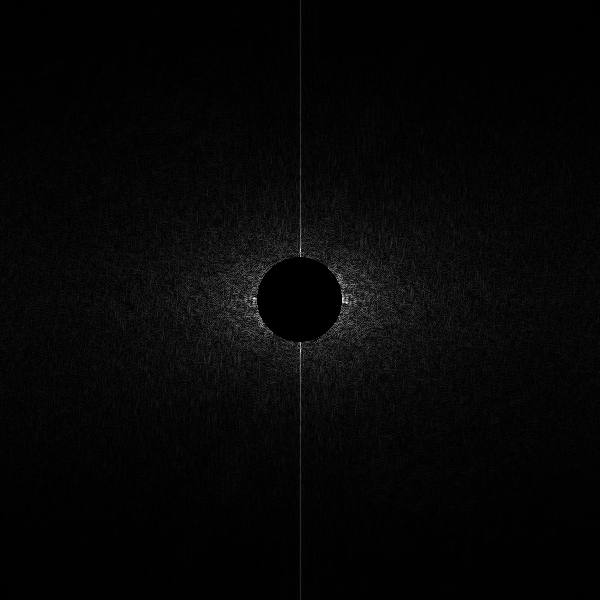

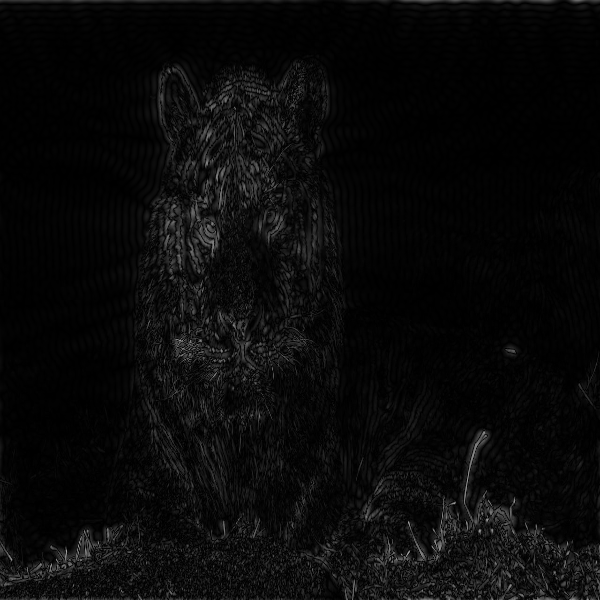

In [ ]:
# FILTRO PASA ALTO
# Parte central valores cercanos al cero.
# y el resto de valores sean altos
F1=np.arange(-x/2+1,x/2+1,1)
F2=np.arange(-y/2+1,y/2+1,1)
[X,Y]=np.meshgrid(F1,F2)    # arreglo matricial de las combinaciones
D=np.sqrt(X**2+Y**2)    # distancia del centro
D=D/np.max(D)
#DEFINIR RADIO DE CORTE
Do=0.10
#Creación del Filtro Ideal en 2D
Huv=np.zeros((x,y)) # matriz de ceros
#PRIMERO CREAR EL FILTRO PASA BAJO IDEAL
for i in range(x):
    for j in range(y):
        if(D[i,j]<Do):
            Huv[i,j]=1
#CONVERTIR A PASA ALTO IDEAL
Huv=1-Huv

#----------------------------------------------------
cv2_imshow(np.uint8(255*Huv))

#--------------------------FILTRADO EN FRECUENCIA
#-MULTIPLICACIÓN ELEMENTO A ELEMENTO EN EL DOMINIO DE LA FRECUENCIA
Guv=Huv*frr
#MAGNITUD
Guv_abs=np.abs(Guv)
Guv_abs=np.uint8(255*Guv_abs/np.max(Guv_abs))
cv2_imshow(Guv_abs)
#---TRANSFORMADA INVERSA PARA OBTENER LA SEÑAL FILTRADA
#IFFT2
gxy=np.fft.ifft2(Guv)
gxy=np.abs(gxy)
gxy=np.uint8(gxy)
#--MOSTRAR LA IMAGEN FILTRADA
cv2_imshow(gxy)
cv2.waitKey(0)
cv2.destroyAllWindows()